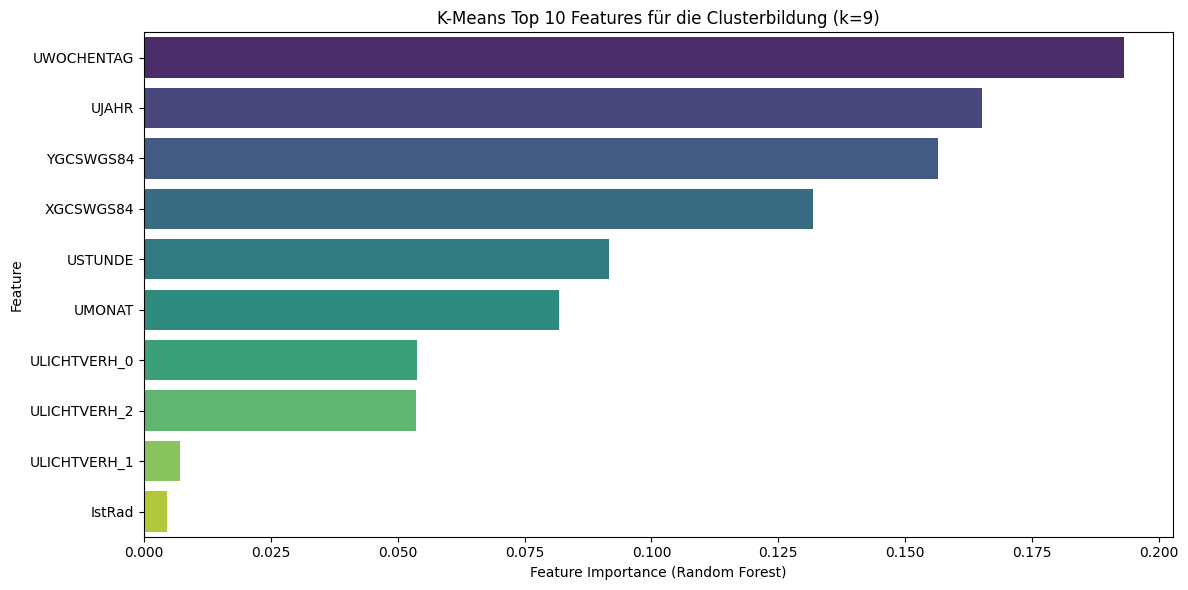

In [4]:

# -*- coding: utf-8 -*-
"""
Ermittlung der wichtigsten Merkmale für die KMeans-Clusterbildung mit Random Forest
"""

# -------------------------------------------
#  Bibliotheken importieren
# -------------------------------------------

import pandas as pd                                # Für Datenhandling mit DataFrames
from sklearn.ensemble import RandomForestClassifier  # Random Forest zur Feature-Importance-Berechnung
import seaborn as sns                              # Für schöne Visualisierungen
import matplotlib.pyplot as plt                    # Zum Erstellen von Diagrammen
import joblib                                      # Zum Laden des gespeicherten KMeans-Modells

# -------------------------------------------
# 1. Daten und KMeans-Modell laden
# -------------------------------------------

# Lade die vorbereiteten, transformierten Daten
df_encoded = pd.read_csv("k_means_ohneBEZ_LOR_encoded_data.csv")

# Lade das zuvor gespeicherte KMeans-Modell
kmeans = joblib.load('kmeans_model.pkl')

# Berechne die Clusterzugehörigkeit für jeden Datenpunkt
df_encoded['Cluster_Original'] = kmeans.predict(df_encoded.drop(columns=['Cluster_Original'], errors='ignore'))

# -------------------------------------------
# 2. Vorbereitung für Random Forest
# -------------------------------------------

# Zielvariable: Cluster-Labels
y = df_encoded['Cluster_Original']

# Prädiktoren: alle anderen Variablen außer Cluster-Label
X = df_encoded.drop(columns=['Cluster_Original'], errors='ignore')

# -------------------------------------------
# 3. Random Forest Modell trainieren
# -------------------------------------------

# Initialisiere und trainiere den Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# -------------------------------------------
# 4. Wichtigste Merkmale extrahieren und sortieren
# -------------------------------------------

# Erzeuge DataFrame mit Merkmalen und deren Wichtigkeit
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})

# Sortiere absteigend nach Wichtigkeit und wähle Top 10 aus
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).head(10)

# -------------------------------------------
# 5. Visualisierung der Top 10 Merkmale
# -------------------------------------------

plt.figure(figsize=(12, 6))
sns.barplot(
    data=feature_importances,
    x='Importance',
    y='Feature',
    hue='Feature',
    palette='viridis',
    legend=False
)

plt.xlabel("Feature Importance (Random Forest)")
plt.ylabel("Feature")
plt.title("K-Means Top 10 Features für die Clusterbildung (k=9)")
plt.tight_layout()
plt.savefig("output/plots/K-Means_Top10_Features_k9.png", dpi=100, bbox_inches="tight")
plt.show()